# Lesson 5.分类模型决策边界与模型评估指标（下）

&emsp;&emsp;接下来，我们进一步讨论关于ROC曲线AUC值的相关内容。

In [1]:
# 科学计算模块
import numpy as np

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

## 四、ROC曲线与AUC值

#### 1.ROC曲线绘制方法与AUC值计算方法

&emsp;&emsp;除了F1-Score以外，还有一类指标也可以很好的评估模型整体分类效力，即ROC曲线与AUC值。当然这二者其实是一一对应的，ROC（全称为Receiver operating characteristic，意为受试者特征曲线）是一个二维平面空间中一条曲线，而AUC则是曲线下方面积（Area Under Curve）的计算结果，是一个具体的值，例如下图所示：

<center><img src="https://i.loli.net/2021/06/03/41i8BwScavFog5r.jpg" alt="1" style="zoom:40%;" />

&emsp;&emsp;其实ROC和AUC是一一对应的，因此二者其实是同一个评估指标。并且，ROC曲线同样也是基于混淆矩阵衍生的二级指标来进行构建，该指标的计算有些类似于交叉熵的计算过程，会纳入分类模型的分类概率来进行模型性能的评估。例如此前所说，对正例样本概率越大、负例样本概率越小，则模型性能越好。

- ROC曲线绘制与AUC面积计算

&emsp;&emsp;接下来，我们来讨论ROC曲线的绘制过程。首先，假设逻辑回归对某一组数据分类结果如下，我们按照预测概率从大到小进行排序：

<center><img src="https://i.loli.net/2021/06/02/WNToIb4wBDjY51V.jpg" alt="107" style="zoom:67%;" />

数据总共20条样本，11条1类样本、9条0类样本。

&emsp;&emsp;此时，我们从1开始逐渐降低阈值。

&emsp;&emsp;在阈值取值范围为0.9-1之间时，模型将判别所有样本都属于0类，对于上述数据集来说，有混淆矩阵计算结果如下：

<center><img src="https://i.loli.net/2021/06/03/9LJxdoWjZfHhQcV.jpg" alt="2" style="zoom:67%;" />

此时，我们令FDR为平面坐标的横坐标点、TPR作为平面坐标的纵坐标点，就可以绘制出ROC曲线上的第一个点：(0, 0)点。

&emsp;&emsp;当然，从此结果上仍然看不出其模型评估价值，为了绘制ROC曲线，我们还需要进一步调整阈值。此时我们不断降低阈值，当阈值跨过0.9时，即介于0.8和0.9之间时，上述混淆矩阵计算结果将发生变化，此时模型将判别概率为0.9的样本为1类，其余样本为0类，此时上述混淆矩阵计算结果如下：

<center><img src="https://i.loli.net/2021/06/03/Q5FMelmqc4ApTJz.jpg" alt="3" style="zoom:67%;" />

而此时我们就计算出了ROC曲线上的第二个点：(0, 0.09)

&emsp;&emsp;如果我们进一步降低阈值，当阈值移动到0.7和0.8之间时，模型判别结果又将发生变化，我们可以继续计算此时的TPR和FDR。在不断调整阈值的过程中，阈值每跨越一个样本的预测概率，FDR和TPR就会发生变化，最终，我们将阈值从1逐渐降低到0的过程中的所有计算结果放在数据表中进行观察:

<center><img src="https://i.loli.net/2021/06/03/zE4IaGySnxusQhN.jpg" alt="4" style="zoom:67%;" />

&emsp;&emsp;当然，我们也可以简单验证上述结果是否正确。例如，当阈值取值范围在0.4-0.51之间时，有一半样本被预测1、另一半被预测为0，此时混淆矩阵计算结果为：

<center><img src="https://i.loli.net/2021/06/03/V7cnSa394WdKJqM.jpg" alt="6" style="zoom:67%;" />

能够发现与表格中结果计算结果一致。

> 当然，FPR和TPR计算结果还有另一个理解角度，那就是我们可以将FPR计算结果视作0类概率累计结果，TPR视作1类概率累计结果。对于上述数据，1类数据共有11条，0类数据共有9条，假设当阈值移动到某个位置时，阈值以上总共有m条1类样本、n条0类样本，则此时FPR=n/9，TPR=m/11。例如当阈值移动到0.6-0.7之间时，m=2、n=1，此时FPR=1/9=1.1，TPR=2/18。

&emsp;&emsp;当阈值完整从1移动0之后，我们即可把上述所有由(FPR,TPR)所组成的点绘制成一张折线图，该折线图就是ROC曲线图：

<center><img src="https://i.loli.net/2021/06/03/dCw9YzoBmjskiTH.jpg" alt="7" style="zoom:50%;" />

而此时，ROC曲线下方面积就是AUC值。

> ROC曲线绘制另一种理解角度。根据上述描述，FPR实际上是0类概率累计，TPR实际上是1类概率累计，则自上而下观察True Class这一列，在原点为起始点时，每当出现一个1时，点就沿着Y轴正方向移动0.9，每当出现一个0时，点就沿着X轴正方向移动0.11，依次类推，最终从原点移动到(1,1)这个点的过程，就构成了ROC曲线。

### 2.ROC-AUC基本性质

&emsp;&emsp;首先，由于FPR和TPR都是在[0,1]区间范围内取值，因此ROC曲线上的点分布在横纵坐标都在[0,1]范围内的二维平面区间内。

&emsp;&emsp;其次，对于任意模型来说，ROC曲线越靠近左上方、ROC曲线下方面积越大，则模型分类性能越好。

&emsp;&emsp;根据点的移动轨迹构成ROC曲线角度来理解，刚开始移动时，是朝向X还是Y轴正向移动，其实是有模型输出概率最高的几个样本决定的，如果这几个样本被判别错了（即实际样本类别为0），则刚开始从原点移动就将朝着X轴正方向移动，此时曲线下方面积会相对更小（相比刚开始朝着Y轴正方向移动的情况），并且根据此前介绍的理论，此时由于模型对于“非常肯定”的样本都判错了，证明模型本身判别性能欠佳；而反之，如果输出概率最高的头部几条样本都判断正确，样本真实类别确实属于1，则点开始移动时将朝向Y轴正方向移动，此时曲线下方面积就将相对更大，模型判别性能也将相对较好。此处可以举例说明：

<center><img src="https://i.loli.net/2021/06/03/EvwdVyA7L5hZzGp.jpg" alt="8" style="zoom:67%;" />

> 上述两个模型对于同一组数据的建模结果差异，可以简单看成模型A中概率结果为0.8和0.6的两条样本，在模型B中被识别为0.6和0.8，两条样本结果互换。

&emsp;&emsp;例如，在0.5为阈值的情况下，模型A和B同样准确率是80%，但模型A是将概率为0.6的1类样本误判为0类、将概率为0.4的样本误判为1类，尚且有情可原，毕竟0.6和0.4的模型输出结果代表着模型其实并没有对这两类样本的所属情况有非常强的肯定，但对于模型B来说，有一条概率结果为0.8的样本被误判，则说明模型B对于一条“非常肯定”属于1类的样本判断是错误的，B模型的“错误”更加“严重”，模型判别性能相对较弱，ROC曲线下方面积相对较小。我们可以在ROC曲线上能够进行非常清楚的展示，接下来就可以通过代码实现上述两个模型的ROC曲线绘制：

> 从这个角度来看，ROC-AUC对模型的分类性能评估和交叉熵计算结果类似。

In [3]:
# 定义阈值取值范围
thr_l = np.linspace(1, 0, 100)

In [4]:
# 输入两个模型预测结果和数据真实标签
yhat_A = np.array([0.9, 0.8, 0.6, 0.4, 0.3]).reshape(-1, 1)
y_A = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)
yhat_B = np.array([0.9, 0.8, 0.6, 0.4, 0.3]).reshape(-1, 1)
y_B = np.array([1, 0, 1, 1, 0]).reshape(-1, 1)

In [5]:
# TPR计算过程
y_cla = logit_cla(yhat_A, thr=0.5)
P = y_cla[y_A == 1]
TPR = P.mean()
TPR

0.6666666666666666

In [6]:
logit_cla(yhat_A, thr=0.5)

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [8]:
y_A

array([[1],
       [1],
       [0],
       [1],
       [0]])

In [7]:
[y_A == 1]

[array([[ True],
        [ True],
        [False],
        [ True],
        [False]])]

In [10]:
logit_cla(yhat_A, thr=0.5)[y_A == 1].mean()

0.6666666666666666

In [5]:
# FPR计算过程
N = y_cla[y_A == 0]
FPR = N.mean()
FPR

0.5

In [12]:
y_cla = logit_cla(yhat_A, thr=0.5)
y_cla

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [14]:
y_A

array([[1],
       [1],
       [0],
       [1],
       [0]])

In [13]:
[y_A == 0]

[array([[False],
        [False],
        [ True],
        [False],
        [ True]])]

In [16]:
y_cla[y_A == 0].mean()

0.5

In [17]:
# 定义ROC曲线绘制函数
def ROC_curve(yhat, y, thr_l, label='ROC_curve'):
    """
    ROC绘制曲线函数：
    :param yhat: 模型输出的类别概率判别结果
    :param y: 样本真实类别
    :param thr_l：阈值取值列表
    :param label：折线图的图例
    :return ：ROC曲线绘制图
    """
    TPR_l = []
    FPR_l = []
    for i in thr_l:
        y_cla = logit_cla(yhat, thr=i)
        P = y_cla[y == 1]
        TPR = P.mean()
        TPR_l.append(TPR)
        N = y_cla[y == 0]
        FPR = N.mean()
        FPR_l.append(FPR)
    plt.plot(FPR_l, TPR_l, label=label)

In [18]:
thr_l

array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
       0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
       0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
       0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
       0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
       0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
       0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
       0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
       0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
       0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
       0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
       0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
       0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
       0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
       0.29292929, 0.28282828, 0.27272727, 0.26262626, 0.25252

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_curve')

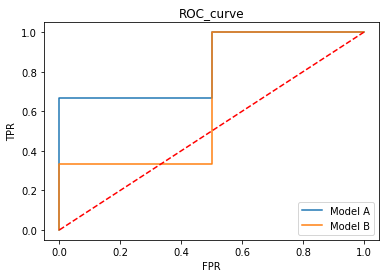

In [7]:
# 绘制ROC曲线
ROC_curve(yhat_A, y_A, thr_l, label='Model A')
ROC_curve(yhat_B, y_B, thr_l, label='Model B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

不难发现，模型A的ROC曲线整体更加趋于空间左上方，并且曲线下方面积更大，说明模型A实际判别性能更好。当然，我们也可以针对此前介绍的逻辑回归模型预测结果来进行ROC曲线绘制

In [28]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
f, l = arrayGenCla(num_class = 2, deg_dispersion = [4, 2], bias = True)          # 离散程度较小

# 数据归一化处理
mean_ = f[:, :-1].mean(axis=0)
std_ = f[:, :-1].std(axis=0)

f[:, :-1] = (f[:, :-1] - mean_) / std_

In [29]:
# 设置随机数种子
np.random.seed(24)  

# 核心参数
batch_size = 50
num_epoch = 200
lr_init = 0.2

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)

lr_lambda = lambda epoch: 0.95 ** epoch

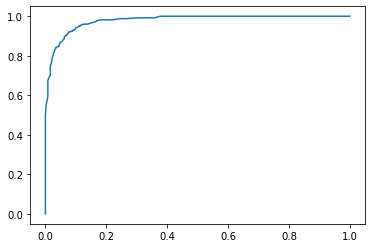

In [30]:
# 模型训练
for i in range(num_epoch):
    w = sgd_cal(f, w, l, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))

# 输出概率结果    
yhat = sigmoid(f.dot(w))

# 绘制ROC曲线图
ROC_curve(yhat, l, thr_l)

&emsp;&emsp;由于构成ROC曲线的点分布在一个平面面积为1的空间内，因此ROC曲线下方面积——AUC的取值范围在0-1之间，并且，当AUC大于0.5时，模型对于该分类问题有一定的分类效力，分类结果好于盲猜；而当AUC取值为0.5时，则说明模型分类效果和忙猜差不了太多，此时极有可能出现如下情况：

In [22]:
[1, 0, 0, 1]*5

[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]

In [21]:
np.linspace(1, 0, 40)

array([1.        , 0.97435897, 0.94871795, 0.92307692, 0.8974359 ,
       0.87179487, 0.84615385, 0.82051282, 0.79487179, 0.76923077,
       0.74358974, 0.71794872, 0.69230769, 0.66666667, 0.64102564,
       0.61538462, 0.58974359, 0.56410256, 0.53846154, 0.51282051,
       0.48717949, 0.46153846, 0.43589744, 0.41025641, 0.38461538,
       0.35897436, 0.33333333, 0.30769231, 0.28205128, 0.25641026,
       0.23076923, 0.20512821, 0.17948718, 0.15384615, 0.12820513,
       0.1025641 , 0.07692308, 0.05128205, 0.02564103, 0.        ])

In [8]:
y = np.array([1, 0, 0, 1]*10).reshape(-1, 1)
y_hat = np.linspace(1, 0, 40).reshape(-1, 1)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'AUC≈0.5')

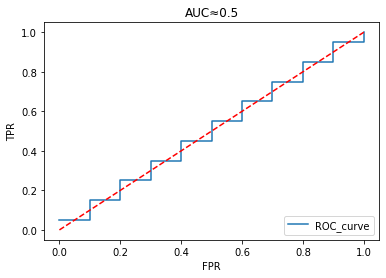

In [9]:
ROC_curve(yhat=y_hat, y=y, thr_l=thr_l)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC≈0.5')
plt.legend(loc = 4)

即对于某条样本来说，无论输出概率结果如何（无论模型预测概率多少），从最终和真实标签的比对结果来看，某条样本被模型判断正确或者错误的概率都是50%，也就和盲猜的结果接近，此时模型并没有任何判别效力。

&emsp;&emsp;而在某些情况下，AUC的取值会小于0.5，此时ROC曲线将出现在平面对角线的下方，而当这种情况发生时，往往说明大多数样本的真实类别都和模型判别类别正好相反。并且，越是高概率样本真实标签为0，ROC曲线就越贴近空间右下方、AUC值就越小。

In [23]:
np.array(([0]*10 + [1]*10) * 5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y = np.array(([0]*10 + [1]*10) * 5).reshape(-1, 1)
y_hat = np.linspace(1, 0, 100).reshape(-1, 1)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'AUC less than 0.5')

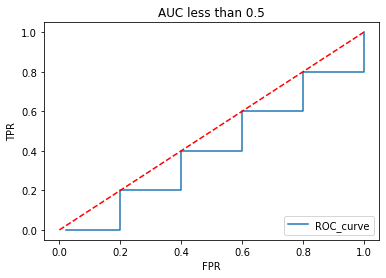

In [11]:
ROC_curve(yhat=y_hat, y=y, thr_l=thr_l)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC less than 0.5')
plt.legend(loc = 4)

> 值得注意的是，尽管当AUC取值小于0.5时，模型输出的概率结果本身并不可用，但此时“大多数样本都正好判别错误”其实也说明模型具有一定的判别效力，因此我们“或许”可以考虑通过将模型判别结果进行“反向处理”，即模型判别结果0、1互换，然后用这组数值进行预测。但需要注意的是，这样的结果哪怕有一定的预测作用但也没有任何的理论依据作为支撑，因此此时的模型仍然不可用。

- ROC的概率敏感特性与偏态数据判别

&emsp;&emsp;此外，如果数据是偏态数据，由于ROC是对概率敏感的判别曲线（根据概率结果而非类别判别结果进行识别），因此ROC能够对模型对于偏态数据中少量样本的识别能力进行评估。例如，假设一个包含十条数据的小样本数据集，其中包含9条0类样本、1条1类样本，同样我们利用两个模型进行判别，模型判别结果如下所示：

<center><img src="https://i.loli.net/2021/06/03/DwJG7uxV6zvdmbe.jpg" alt="9" style="zoom:67%;" />

则对于这两个模型来说，在阈值为0.5的情况下，准确率都是60%，且F1-Score都是0.33

<center><img src="https://i.loli.net/2021/06/03/i8qa3R1eGXSulb9.jpg" alt="10" style="zoom:67%;" />

但由于ROC是概率敏感的评估指标，对于不同的两个模型，只要在不同类别的概率计算结果分布上有所差异，最终ROC的绘制情况都会不同。对于上述两个模型来说，我们可以通过如下方式绘制两个不同模型的ROC曲线：

In [12]:
yhat = np.array([0.9, 0.8, 0.7, 0.6, 0.51, 0.4, 0.3, 0.2, 0.1, 0.01]).reshape(-1, 1)

In [13]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
y_A = np.eye(10)[:,1:2]
y_A

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
y_B = np.eye(10)[:,3:4]
y_B

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_curve')

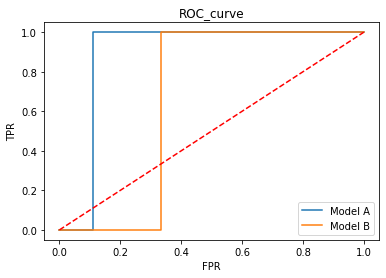

In [16]:
ROC_curve(yhat, y_A, thr_l, label='Model A')
ROC_curve(yhat, y_B, thr_l, label='Model B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

很明显，从最终AUC面积来看，模型A效果好于模型B。而对概率敏感，也使得ROC在很多情况下具有比F1-Score更加敏感的模型性能的识别精度。并且从上述结果中能够看出，ROC和F1-Score类似，少数的1类样本的判别结果会很大程度影响AUC的计算结果，因此ROC-AUC也能用于判别模型在偏态样本上的分类能力。

> 可以拓展讨论的一个点是，ROC-AUC对于模型在偏态样本上分类能力的评判，其实也会受到偏态样本“偏态”程度的影响，其实就上述案例来说，在A、B模型对唯一的一个1类样本判别概率为0.8、0.6的差异情况下，模型AUC值的差异其实会受到剩余0类样本数量的影响，剩余0类样本数量越多、两个模型AUC值的差异越大。正是这种AUC值的差异会被0类样本“稀释”的性质，导致如果我们在利用偏态数据建模时，可以通过减少0类样本的样本量（如欠采样、数据聚类等）来提升1类样本在AUC计算结果时的权重。相关内容我们会在后续课程中详细讨论。

- ROC排序敏感

&emsp;&emsp;其实，如果我们更加深入的进行思考和观察，我们会发现，ROC-AUC其实是对根据模型预测的概率结果降序排序后的数据真实标签的各元素位置敏感，例如，对于下述A、B两个模型，尽管在部分样本的预测概率不同，但由于最终的按照预测概率降序排序的真实标签排序相同，因此两个模型最终绘制的ROC曲线相同。

<center><img src="https://i.loli.net/2021/06/12/5adhxjiLYAJcs1z.jpg" alt="14" style="zoom:67%;" />

In [17]:
# 定义阈值取值范围
thr_l = np.linspace(1, 0, 100)

In [18]:
# 输入两个模型预测结果和数据真实标签
yhat_A = np.array([0.9, 0.8, 0.56, 0.4, 0.3]).reshape(-1, 1)
y_A = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)
yhat_B = np.array([0.7, 0.6, 0.56, 0.4, 0.3]).reshape(-1, 1)
y_B = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_curve')

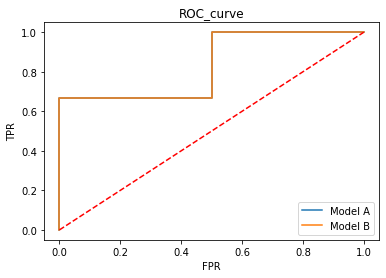

In [19]:
# 绘制ROC曲线
ROC_curve(yhat_A, y_A, thr_l, label='Model A')
ROC_curve(yhat_B, y_B, thr_l, label='Model B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

> 当然，ROC这种排序特性会导致其在某些情况下失去判别效力，但这种情况也不必过于担心。首先，在以交叉熵作为损失函数建模时，对于性能较好的模型有时会有过拟合倾向，而由于ROC只对排序敏感，因此有时也会消除这种过拟合倾向；其次，我们也可以通过适当调整阈值来手动让其变得概率敏感。

- ROC的类别对称性与F1-Score指标的比较

&emsp;&emsp;根据上述讨论，我们已经知道ROC由于是概率敏感，所以相比F1-Socre，ROC其实能够对模型的判别能力有更深刻的评判。此外，ROC还有另外一个特性——那就是类别对称性。

&emsp;&emsp;在此前介绍F1-Socre的时候，我们讨论，F1-Score并不是类别对称的，而是更加侧重于评估模型在识别1类样本时的整体性能，但ROC却是类别对称的，即如果我们将数据中的0和1类互换，而模型原先预测1的类概率就变成了现在预测0类的概率，此时ROC曲线会参照$x+y=1$的直线进行对称变换，但AUC面积不变，即模型性能评估数值仍然不会发生变化。

&emsp;&emsp;我们可以通过如下实验来进行验证，对于同样一组数据，采用模型分别对原数据和翻转后数据进行判别，得到结果A和B：

<center><img src="https://i.loli.net/2021/06/11/k6C9Ryr3pKuxXzT.jpg" alt="12" style="zoom:67%;" />

In [13]:
# 定义阈值取值范围
thr_l = np.linspace(1, 0, 100)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_curve')

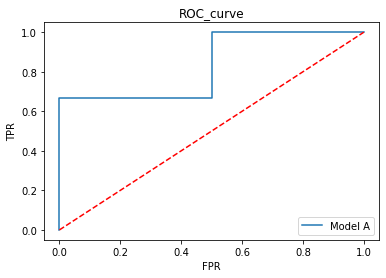

In [14]:
# 输入结果A
yhat_A = np.array([0.9, 0.8, 0.6, 0.4, 0.3]).reshape(-1, 1)
y_A = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)

# 绘制ROC曲线
ROC_curve(yhat_A, y_A, thr_l, label='Result A')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC_curve')

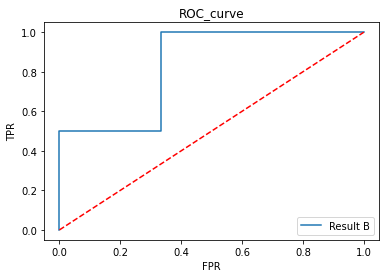

In [15]:
# 输入结果B
yhat_B = np.array([0.7, 0.6, 0.4, 0.2, 0.1]).reshape(-1, 1)
y_B = np.array([1, 0, 1, 0, 0]).reshape(-1, 1)

# 绘制ROC曲线
ROC_curve(yhat_B, y_B, thr_l, label='Result B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

我们将二者放在同一画布上进行比较：

<AxesSubplot:>

<AxesSubplot:>

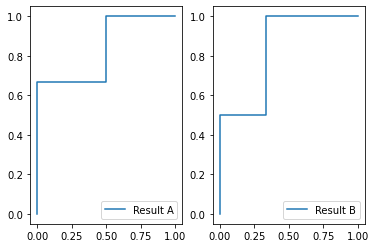

In [20]:
plt.subplot(121)
ROC_curve(yhat_A, y_A, thr_l, label='Result A')
plt.legend(loc = 4)
plt.subplot(122)
ROC_curve(yhat_B, y_B, thr_l, label='Result B')
plt.legend(loc = 4)

结合上述两组结果的FPR和TPR计算结果，我们不难发现，二者的AUC计算结果都是$1-0.5*(1-0.66)=0.83$，而这也正是由于两个ROC曲线围绕$x+y=1$对称所导致的。

<center><img src="https://i.loli.net/2021/06/11/k6C9Ryr3pKuxXzT.jpg" alt="12" style="zoom:67%;" />

&emsp;&emsp;因此，尽管同样是衡量模型整体评估性能，但相比之下，F1-Score更加倾向于判别模型对1类样本的识别能力，而ROC-AUC则没有这方面的倾向性。因此，ROC-AUC和F1-Score之间的选取问题，同样也需要根据业务需要来进行选择，如果需要重点考虑1类是否被正确识别，则更加倾向选择F1-Score，但如果没有其他特殊要求，则一般会考虑使用ROC-AUC作为模型评估指标。